# **Vehicle dataset from cardekho**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [41]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Numerical and categorical data

In [42]:
def seperate_num_cat():
  print("Shape of dataset: ",df.shape)
  numerical = ['Selling_Price','Present_Price','Kms_Driven']
  categorical = ['Fuel_Type','Seller_Type','Transmission','Owner']
  print("\nNo of unique values in categories:\n")
  for cat in categorical:
    print(cat,": ",df[cat].unique())
  return numerical,categorical

numerical,categorical=seperate_num_cat()

Shape of dataset:  (301, 9)

No of unique values in categories:

Fuel_Type :  ['Petrol' 'Diesel' 'CNG']
Seller_Type :  ['Dealer' 'Individual']
Transmission :  ['Manual' 'Automatic']
Owner :  [0 1 3]


# Checking null values

In [43]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Drop car name and Year attributes (irrelevant) and adding new attribute (age)

Obs: No null values present

In [44]:
dataset=df.drop('Car_Name',axis='columns')
# dataset.head()

In [45]:
dataset['current_year']=[2021]*len(dataset)
dataset['age']=dataset['current_year']-dataset['Year']
dataset.drop('current_year',axis='columns',inplace=True)
dataset.drop('Year',axis='columns',inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


# One-hot encoding of categorical data

In [46]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


# Visualization

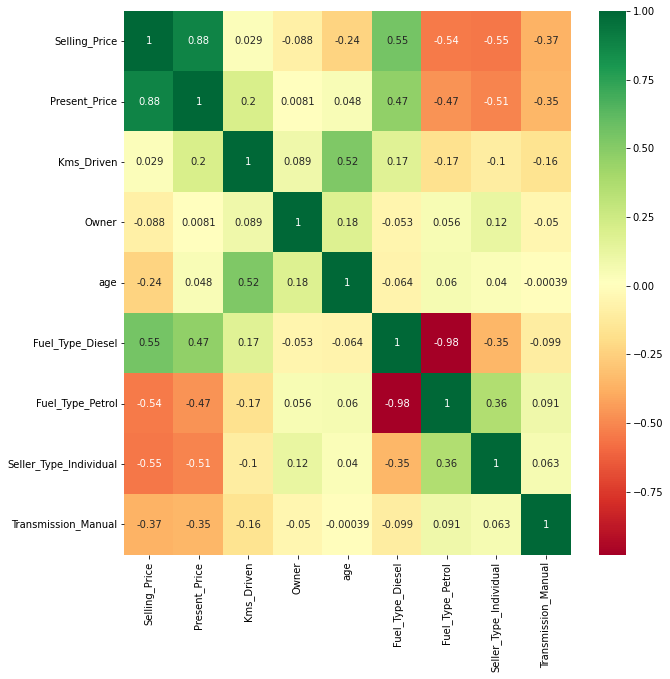

In [47]:
corr_mat=dataset.corr()
plt.figure(figsize=(10,10))
g=sns.heatmap(dataset[corr_mat.index].corr(),annot=True,cmap="RdYlGn")

In [48]:
# sns.pairplot(dataset)

# Seperating data and labels

In [50]:
label=dataset['Selling_Price']
data=dataset.iloc[:,1:]
data.head()

,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


# Feature importance

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(data,label)

ExtraTreesRegressor()

In [52]:
model.feature_importances_

array([0.39239001, 0.04036652, 0.00043136, 0.07494684, 0.22599365,
       0.0093051 , 0.11642343, 0.14014308])

Obs: Present price and Fuel_Type_Diesel have the most importance

# Splitting train and test data

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,label,test_size=0.2)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(240, 8) (240,)
(61, 8) (61,)


# Hyperparameter tuning using RandomizedSearchCV

In [55]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1500,num=15)]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split=[2,5,10,15,30,80,100]
min_samples_leaf=[1,2,5,10]
max_features=['auto','sqrt']

In [58]:
from sklearn.model_selection import RandomizedSearchCV
grid={'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'max_features':max_features}

# Application of RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [60]:
randomized_search_CV=RandomizedSearchCV(estimator=rf,param_distributions=grid,scoring='neg_mean_squared_error',n_iter=20,cv=5,verbose=2,random_state=42,n_jobs=1)

In [ ]:
randomized_search_CV.fit(X_train,Y_train)

In [63]:
predictions=randomized_search_CV.predict(X_test)
predictions

array([ 1.96736667,  1.11011667,  0.41886667,  0.45816667,  6.20408333,
        0.58363333,  5.19985   ,  7.4135    ,  0.45861667, 16.03623333,
        0.38758333,  7.8373    ,  1.18403333,  8.78516667,  1.18148333,
        3.002     ,  5.2834    ,  1.50891667,  8.22616667,  5.33441667,
        2.38423333,  7.92391667,  0.19571667,  4.00263333,  1.01426667,
        7.86613333,  1.10768333,  7.30883333,  5.34271667,  9.74025   ,
        0.43186667,  5.35833333,  5.93486667, 11.60661667,  9.48448333,
        2.46138333,  2.88166667,  2.8965    ,  3.36508333,  7.60921667,
        4.38173889,  4.64025   , 10.42581667,  5.31675   ,  0.24351667,
        3.74236667,  6.79126667,  0.69653333,  6.9106    ,  5.53498333,
        3.98798115,  8.56088333,  3.12641667,  6.45838333,  3.00358333,
        0.16953333,  5.97131111,  3.77091667,  4.28762698,  0.57461667,
        7.06385   ])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


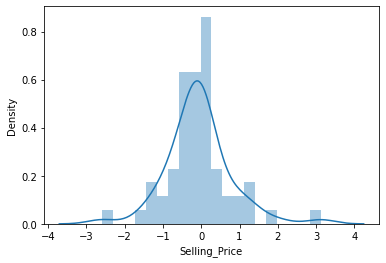

In [65]:
sns.distplot(Y_test-predictions)

# Calculating the mean squared error

In [66]:
mse=np.square(np.subtract(Y_test,predictions)).mean()

In [67]:
mse

0.7124975273786979